# Исследование данных о продаже компьютерных игр

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. У нас есть исторические данные до 2016 года

**Цель исследования** - выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально прибыльный продукт и правильно спланировать рекламные кампании.

**Необходимо:**
1. Выявить потенциально прибыльные платформы
2. Найти самые прибыльные жанры
3. Узнать, как влияют на продажи отзывы пользователей и критиков
4. Составить общие портреты пользователей разных регионов
5. Проверить несколько гипотез:
  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  * Средние пользовательские рейтинги жанров Action и Sports разные

**Ход исследования**
1. Предобработка данных
  * Обработка пропусков
  * Изменение типов данных
2. Исследовательский анализ
  * Выбор актуального периода для исследования
  * Поиск потенциально прибыльных платформ
  * Изучение глобальных продаж по платформам
  * Исследование влияния оценок пользователей и критиков на продажи
  * Поиск прибыльных жанров
3. Составление портретов пользователей по регионам (Северная Америка, Европа, Япония)
  * Самые популярные платформы
  * Самые популярные жанры
  * Влияние рейтинга ESRB на продажи
4. Проверка гипотез
  * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  * Средние пользовательские рейтинги жанров Action и Sports разные
5. Вывод

## Загрузка данных и изучение общей информации о них

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('chained_assignment', None)

In [2]:
data = pd.read_csv('games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


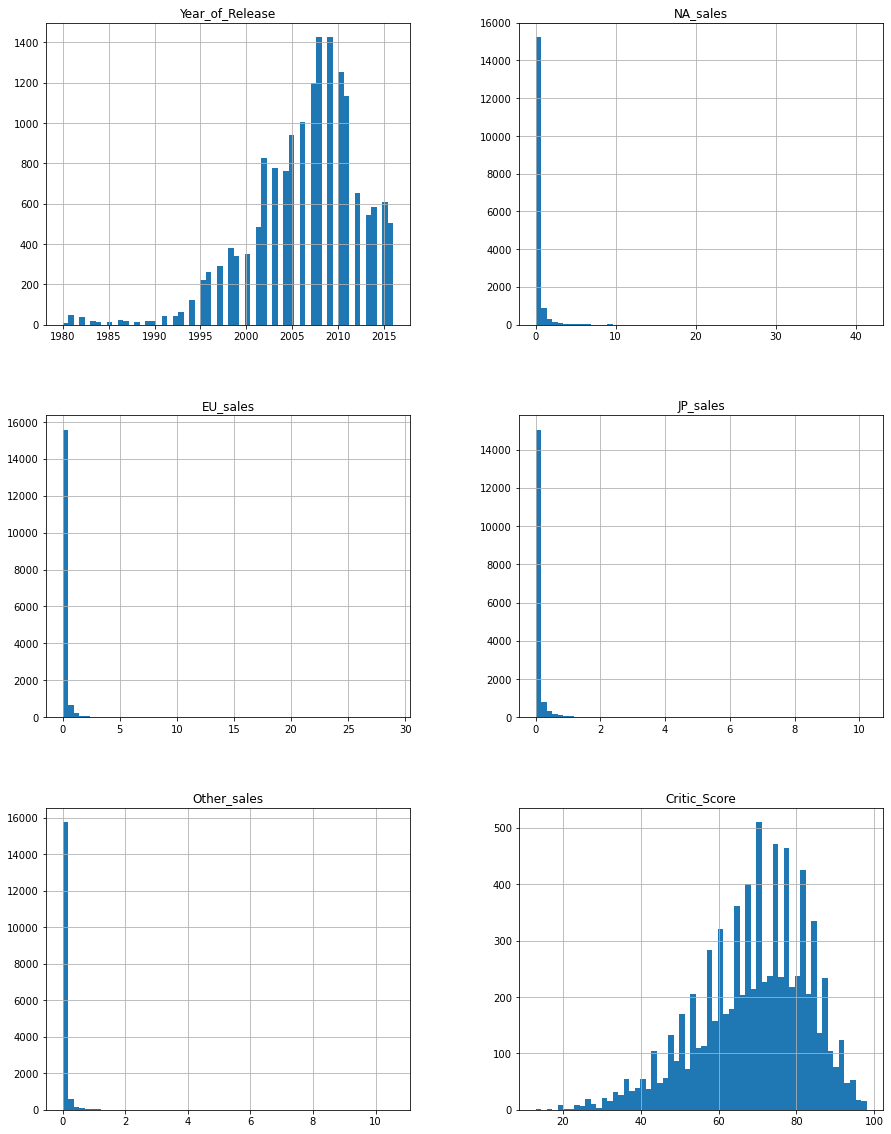

In [4]:
data.hist(figsize=(15, 20), bins=60)
plt.show()

**Описание данных**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке (миллионы проданных копий)

`EU_sales` — продажи в Европе (миллионы проданных копий)

`JP_sales` — продажи в Японии (миллионы проданных копий)

`Other_sales` — продажи в других странах (миллионы проданных копий)

`Critic_Score` — оценка критиков (максимум 100)

`User_Score` — оценка пользователей (максимум 10)

`Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Подготовка данных

### Исправление названий столбцов

In [5]:
old_names = list(data.columns)
new_names = [name.lower() for name in old_names]

data = data.rename(
    columns={old_names[i] : new_names[i] for i in range(data.shape[1])}
)

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Для наглядности еще раз выведем общую информацию о датафрейме

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропуски есть в колонках `name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`.

In [7]:
pd.DataFrame(round(data.isna().mean()*100, 1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Очень много пропусков в столбцах с оценками пользователей и критиков, а также в столбце с рейтингом ESRB. В остальных колонках пропусков мало, поэтому, скорее всего, мы их просто удалим

##### Пользовательская оценка

Для начала разберемся с аббревиатурой 'tbd'. Эта аббревиатура, вероятнее всего, означает, что оценка неопределена. Что касается пропущенных значений, логично предположить, что пропуски также говорят о неопределенности оценки. Поэтому, чтобы было удобнее работать, заменим все значения 'tbd' на nan

In [8]:
data['user_score'] = data['user_score'].replace(to_replace='tbd', value=np.nan)
data['user_score'] = pd.to_numeric(data['user_score'], errors='ignore')

Для изменения типа данных в столбце `user_score` использовался метод `pd.to_numeric` с параметром `errors='ignore`, чтобы сохранить значения, которые являются пропусками. 

Добавим в датафрейм столбец `user_tbd` булевого типа (1 соответствует неопределенному рейтингу, то есть пропуску, а 0 - всем остальным значениям)

In [9]:
data['user_tbd'] = 0
data.loc[data['user_score'].isna(), 'user_tbd'] = 1

In [10]:
# Проверка
data['user_tbd'].value_counts()

1    9125
0    7590
Name: user_tbd, dtype: int64

In [11]:
# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  user_tbd         16715 non-null  int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


##### Название и жанр

Заметим, что в соответствующих колонках одинаковое число пропусков. Проверим, совпадают ли строки с пропущенными значениями в этих колонках

In [12]:
data[data['name'].isna() & data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_tbd
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,1
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,1


И правда, строки совпадают. Более того, в этих строках очень много пропусков и в других колонках. Также стоит заметить, что это игры 1993 года... Получается, что эти данные уже совсем неактуальны. Принимая во внимание эти аспекты, можем удалить эти строки.

In [13]:
data = data[~(data['name'].isna() & data['genre'].isna())]

##### Оценка экспертов

Пропуски в этом столбце, вероятно, появились по тем же причинам, что и в столбце с пользовательскими оценками, то есть ввиду отсутствия оценок для этих игр. Поступим с ними также, как и с пропусками в столбце `user_score`: оставим пропуски как есть и добавим индикаторный столбец `critic_tbd`

In [14]:
data['critic_tbd'] = 0
data.loc[data['critic_score'].isna(), 'critic_tbd'] = 1

In [15]:
# Проверка
data['critic_tbd'].value_counts()

1    8576
0    8137
Name: critic_tbd, dtype: int64

In [16]:
# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  user_tbd         16713 non-null  int64  
 12  critic_tbd       16713 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 1.8+ MB


##### Год релиза

В этой колонке около 270 пропусков. Это примерно 2.5% от общего количества данных. Ввиду того, что наша цель - построить прогноз на следующий год, данные об играх, год релиза которых неизвестен, не актуальны. Удалим соответствующие строки

In [17]:
data = data.loc[~data['year_of_release'].isna()]

In [18]:
# Проверка
data['year_of_release'].isna().sum()

0

##### Рейтинг

Для начала подробнее изучим этот столбец

In [19]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

В этом столбце около 6800 пропусков... И еще есть значения, которые встречаются менее 10 раз... Делать выводы относительно игр с категориями, встречающимися редко, статистически некорректно. Удалять 6000 игр - тоже нехорошо. Сильнее всего на рейтинг влияет жанр игры. Сгруппируем игры по жанрам и найдем самую популярную категорию из столбца `rating` для каждого жанра. 

In [20]:
data[data['critic_score'].isna() & data['rating'].isna() & data['user_score'].isna()].shape[0]

6580

Видно, что в основном пропуски одновременно наблюдаются в колонках с оценками и с рейтингом. Скорее всего, эти пропуски возникали вместе, то есть не независимо друг от друга. Тогда если игра не была оценена критиками, то, вероятнее всего, она не была оценена и организацией ESRB. Тут стоит упомянуть о том, что ESRB - это организация, работающая в Канаде и США, поэтому на игры, продающиеся в Японии, она далеко не всегда оказывает влияние. Соответственно, обилие пропусков в этой колонке вполне объяснимо. Получается, что пропуски в этой колонке являются закономерными, а значит, удалять их нельзя. Заменим их на значение `Unknown`

In [21]:
data['rating'] = data['rating'].fillna('Unknown')
data['rating'].isna().sum()

0

### Изменение типов данных

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  user_tbd         16444 non-null  int64  
 12  critic_tbd       16444 non-null  int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 1.8+ MB


In [23]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [24]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Изменим тип данных в следующих столбцах: `year_of_release` на int (тип datetime будет сильно громоздким в нашем случае, а номер года дробным не бывает), `user_score` на float (оценки от 0 до 10 с дробной частью)

In [25]:
def to_int(x):
    try:
        return int(x)
    except:
        return x


data['year_of_release'] = data['year_of_release'].apply(to_int)

Столбец `user_score` был обработан раньше

In [26]:
# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  user_tbd         16444 non-null  int64  
 12  critic_tbd       16444 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 1.8+ MB


### Добавление столбца для анализа

Посчитаем суммарные продажи по всем регионам и занесем их в отдельный столбец

In [27]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [28]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_tbd,critic_tbd,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,0,0,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,1,1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0,0,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,0,0,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,1,1,31.38


## Исследовательский анализ

### Количество игр по годам

In [29]:
year_count_pivot = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
year_count_pivot.head(10)

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


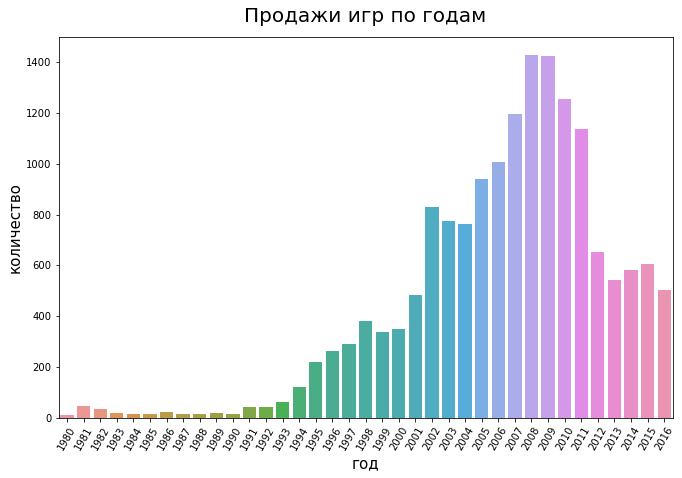

In [30]:
fig, ax = plt.subplots(figsize = (11, 7))
graph = sns.barplot(x=year_count_pivot.index, y=year_count_pivot['name'], ax=ax)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 60)
graph.set_title('Продажи игр по годам', fontsize=20, pad=15)
graph.set_ylabel('количество', fontsize=15)
graph.set_xlabel('год', fontsize=15)
plt.show()

Из этой гистограммы видно, что в 80-е года 20 века игр выпускалось очень мало по сравнению с последующими годами. В это время эта область только зарождалась, а потому не была так популярна, как сейчас. В 90-е годы начался постепенный рост количества выпускавшихся игр, а своего максимума это количество достигло в 2008-2009 годах, после чего снова начался спад, причем более резкий, чем рост. Далее ситуация стабилизировалась

Ясно, что для построения прогноза на 2017 год нет смысла использовать данные за то время, когда компьютерные игры только зарождались, так как тогда их было очень мало по сравнению с тем, сколько их выпускалось после этого. Поэтому данные до 2001 года смотреть не будем.

### Продажи по платформам

In [31]:
platforms_sales_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platforms_sales_pivot = platforms_sales_pivot.sort_values(by='total_sales', ascending=False)
platforms_sales_pivot.head(15)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выберем платформы с наибольшим суммарным числом продаж и посмотрим на распределени по годам. Границу установим в 250 млн проданных копий. Далее для каждой платформы построим распределение продаж по годам. Также посчитаем среднее и медианное время "жизни" платформы.

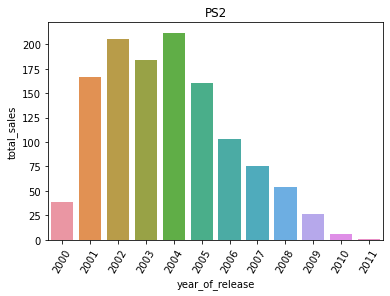

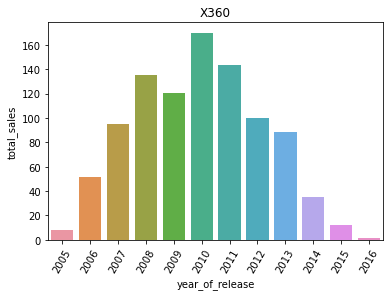

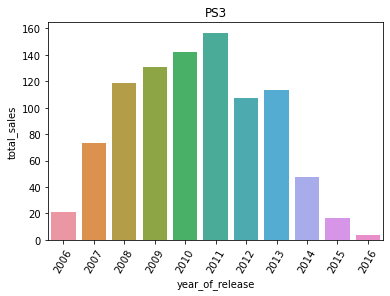

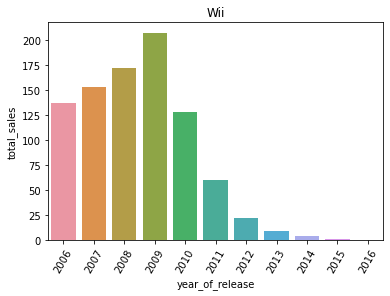

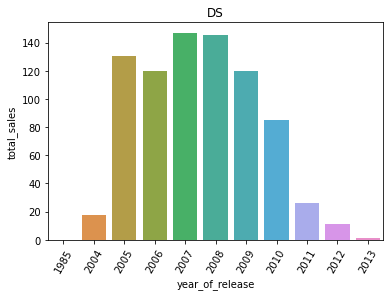

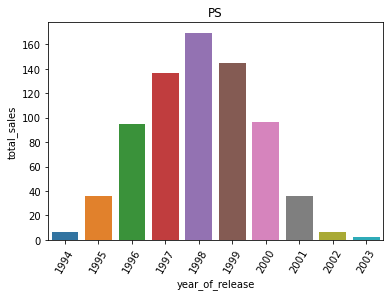

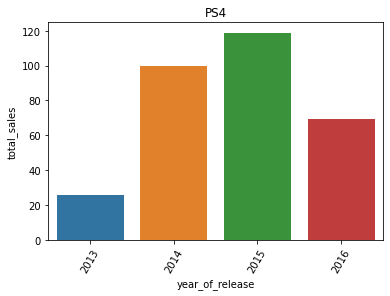

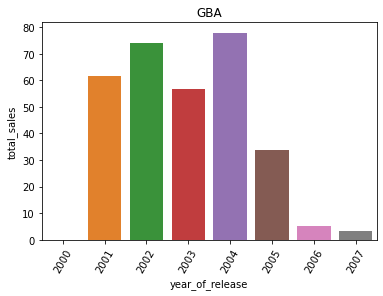

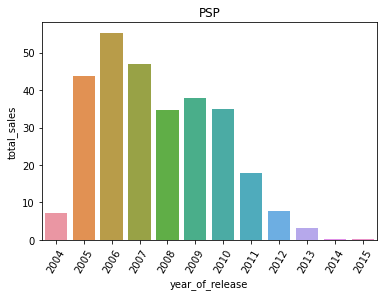

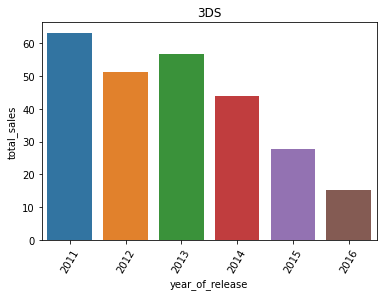

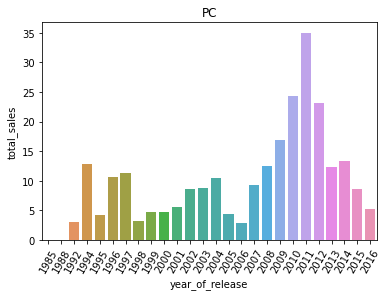

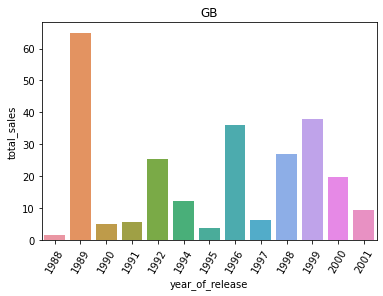

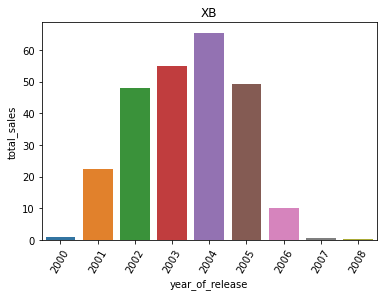

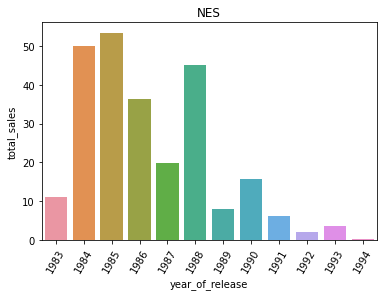


Среднее время жизни платформы: 12.0 лет
Медианное время жизни платформы: 10.5 лет


In [32]:
top_platforms = platforms_sales_pivot.query("total_sales >= 250")
top_platforms = top_platforms.reset_index()

platforms_life = []

for platform in top_platforms['platform']:
    platform_pivot = data.query("platform == @platform").pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
    )
    
    platforms_life.append(max(platform_pivot.index) - min(platform_pivot.index))
    
    graph = sns.barplot(x=platform_pivot.index, y=platform_pivot['total_sales'])
    graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
    graph.set_title(platform)
    plt.show()
    
    print()

print(f'Среднее время жизни платформы: {pd.Series(platforms_life).mean()} лет')
print(f'Медианное время жизни платформы: {pd.Series(platforms_life).median()} лет')

Из полученных графиков и посчитанных статистик видно, что в основном платформы "живут" около 10-12 лет. А вот характерное время, когда платформа является довольно популярной, чаще всего составляет 5-7 лет.

### Актуальный период

На основании полученных результатов определим актуальный период. Мы знаем, что в среднем платформа актуальна в течение 5-7 лет. Нам нужно найти такие, которые будут актуальны в 2017 году. Возьмем актуальный период равным 3 годам. Так мы будем видеть актуальное состояние всех платформ

In [33]:
data = data[data['year_of_release'] >= 2013]
data.shape

(2233, 14)

### Анализ продаж по платформам

##### Выбор потенциально прибыльных платформ

Определим вначале, какие платформы лидируют по продажам. Затем посмотрим на то, какие растут, а какие падают. После этого выберем несколько потенциально прибыльных платформ

In [34]:
platforms_sales_pivot = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
platforms_sales_pivot = platforms_sales_pivot.sort_values(by='total_sales', ascending=False)
platforms_sales_pivot.head()

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80


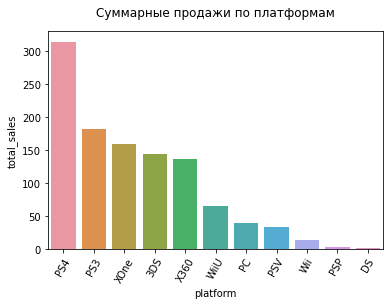

In [35]:
graph = sns.barplot(x=platforms_sales_pivot.index, y=platforms_sales_pivot['total_sales'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Суммарные продажи по платформам', pad=15)

plt.show()

Видно, что лидерами являются PS4, PS3, XOne, 3DS и X360. Посмотрим теперь, какие платформы растут, а какие падают. Для этого построим графики количества продаж по этим платформам по годам

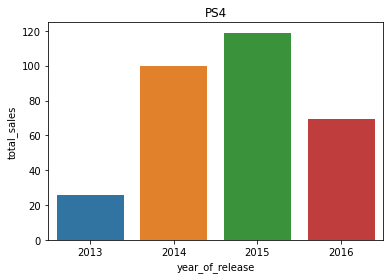

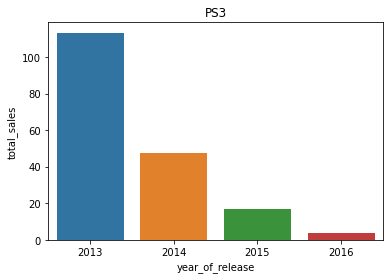

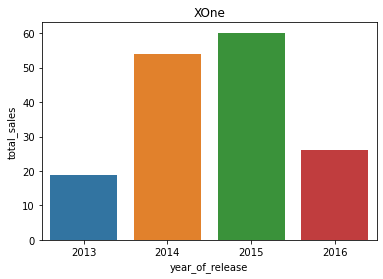

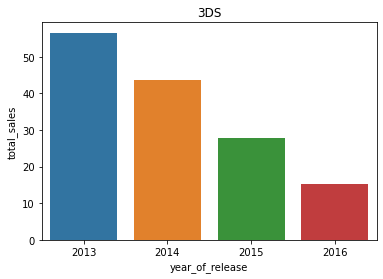

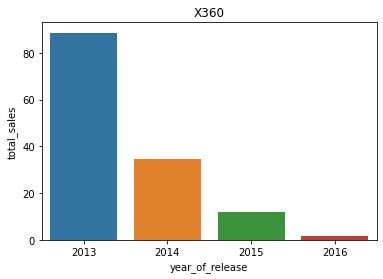

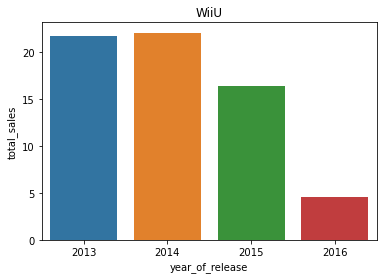

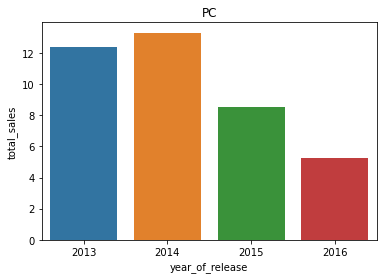

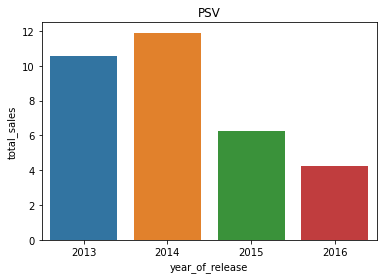

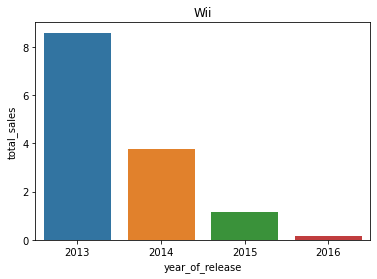

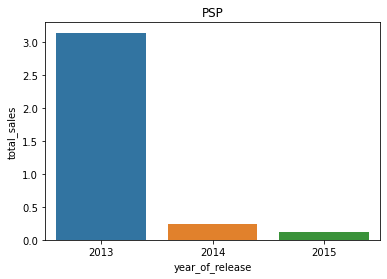

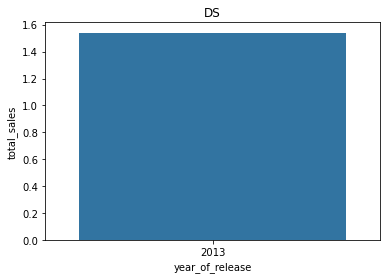

In [36]:
platforms_sales_pivot = platforms_sales_pivot.reset_index()

for platform in platforms_sales_pivot['platform']:
    platform_pivot = data.query("platform == @platform").pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
    )
    
    graph = sns.barplot(x=platform_pivot.index, y=platform_pivot['total_sales'])
    graph.set_title(platform)
    plt.show()
    
    print()

В большинстве своем продажи по платформам падают. Однако мы все же можем выделить несколько платформ, по которым это падение еще не столь критично. Это PS4, 3DS и XOne, причем самая потенциально прибыльная из них - PS4. Продажи игр на этих трех платформах в 2016 году только начали падать, а на PS4 их уровень еще можно попробовать поднять. Что касается 3DS и XOne, на них продажи падают, но по сравнению с другими платформами, в 2016 году у них не такие уж и низкие значения. Можно использовать их в качестве резерва, а основной акцент сделать на PS4. Также стоит отметить, что эти три платформы входят в ТОП-5 по продажам, а PS4 вообще лидирует с большим отрывом

##### Анализ общего количества продаж по платформам

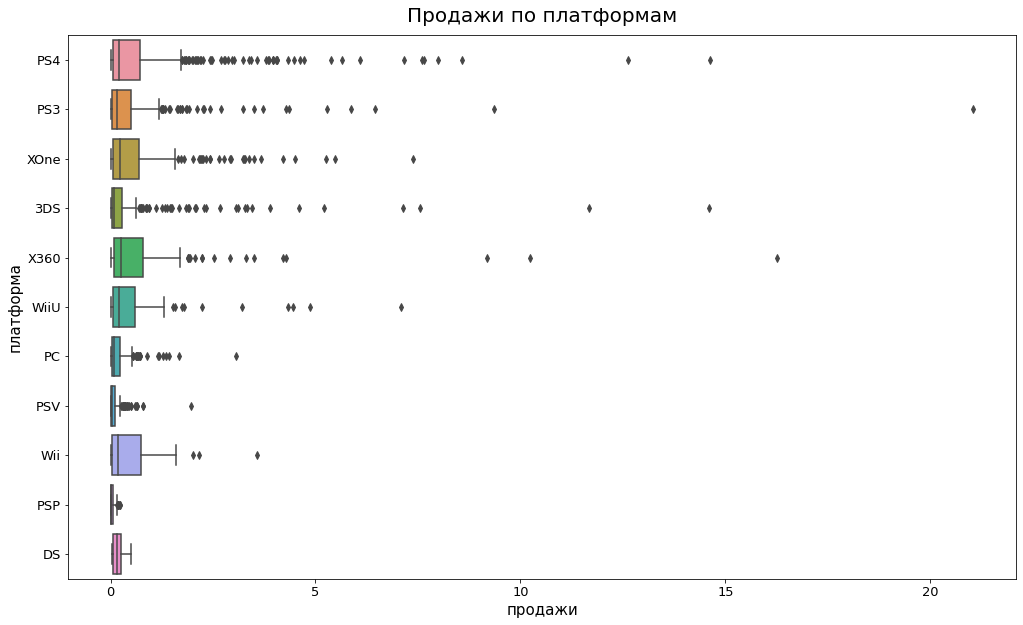

In [37]:
fig, ax = plt.subplots(figsize = (17, 10))
ax = sns.boxplot(data=data, x='total_sales', y='platform', order=list(platforms_sales_pivot['platform']), ax=ax)
ax.set_title('Продажи по платформам', pad=13, fontsize=20)
ax.set_ylabel('платформа', fontsize=15)
ax.set_xlabel('продажи', fontsize=15)
ax.tick_params(axis='both', labelsize=13)

(0.0, 5.0)

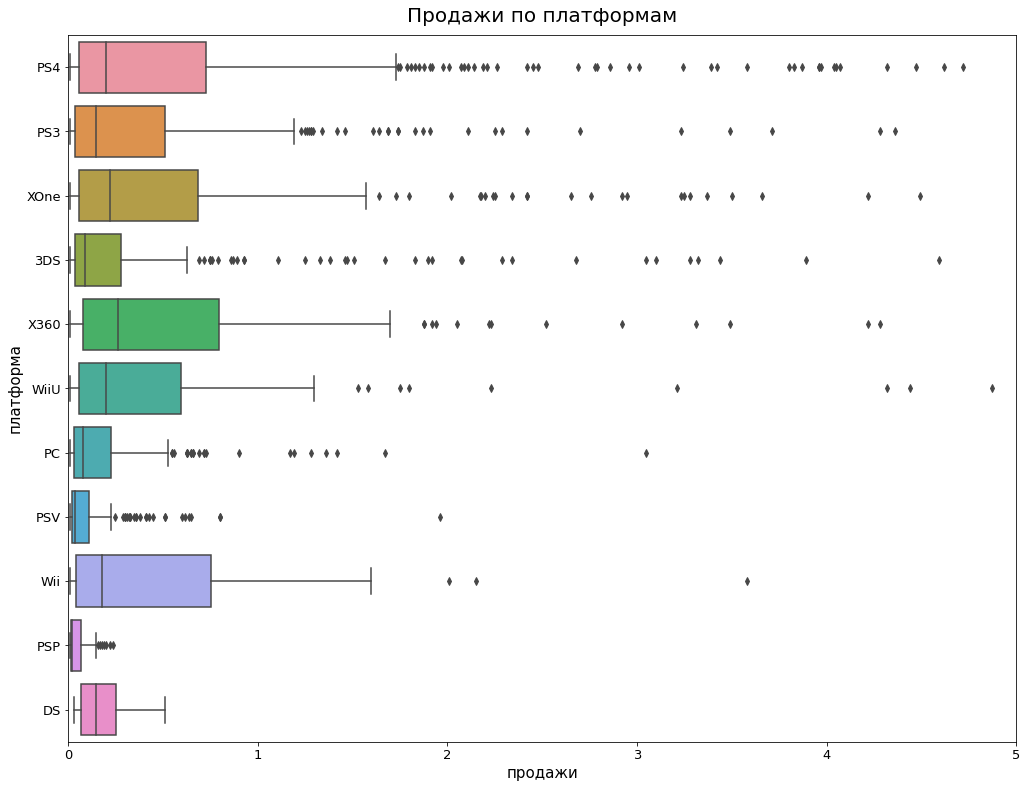

In [38]:
fig, ax = plt.subplots(figsize = (17, 13))
ax = sns.boxplot(data=data, x='total_sales', y='platform', order=list(platforms_sales_pivot['platform']), ax=ax)
ax.set_title('Продажи по платформам', pad=13, fontsize=20)
ax.set_ylabel('платформа', fontsize=15)
ax.set_xlabel('продажи', fontsize=15)
ax.tick_params(axis='both', labelsize=13)
ax.set_xlim(0, 5)

Из этих двух графиков с разным масштабом хорошо видно, что платформы образуют несколько групп по количеству продаж. Например, PS4, XOne, X360, Wii уместно объединить в одну группу, так как большинство игр, созданных на этих платформах собирает примерно одинаковое количество продаж (во всяком случае, продажи по отдельным играм попадают в определенный диапазон, который у этих платформ весьма схожий: примерно от 0 до 1.8 миллионов продаж на игру). Следующая группа: WiiU, PS3 (диапазон количества продаж: 0-1.2 млн). И последняя группа: DS, PC, PSP, PSV, 3DS (диапазон количества продаж: 0-0.5 млн).

Также можно сказать следующее: большинство игр собирают до 2 млн продаж, однако встречаются и такие, которые собирают от 2 до 5 млн или даже больше 10 млн. Но это уже какие-то отдельные, получившие признание публики, игры

##### Влияние отзывов на продажи

Выберем самую популярную платформу (по количеству созданных на ее основе игр) и посмотрим, как влияют отзывы пользователей и критиков на продажи внутри этой платформы

In [39]:
games_count = data.pivot_table(
    index='platform',
    values='name',
    aggfunc='count'
).sort_values(by='name', ascending=False)

games_count = games_count.rename(columns={'name' : 'games_count'})
games_count.head()

,games_count
platform,
PS4,392
PSV,358
PS3,345
3DS,303
XOne,247


Теперь посмотрим на самую популярную по продажам платформу

In [40]:
platforms_sales_pivot.head()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80


Видно, что по количеству продаж лидирует PS4. Также эта платформа является лидером по количеству созданных на платформе игр. Получается, что данная платформа является самой популярной среди разработчиков. Именно ее мы возьмем для изучения вопроса влияния отзывов на продажи

Text(0.5, 1.0, 'Влияние отзывов критиков на количество продаж. Платформа PS4')

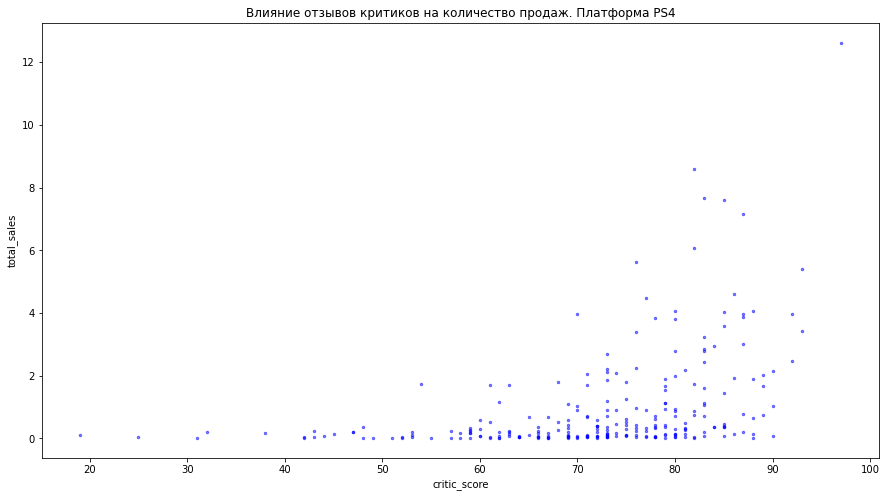

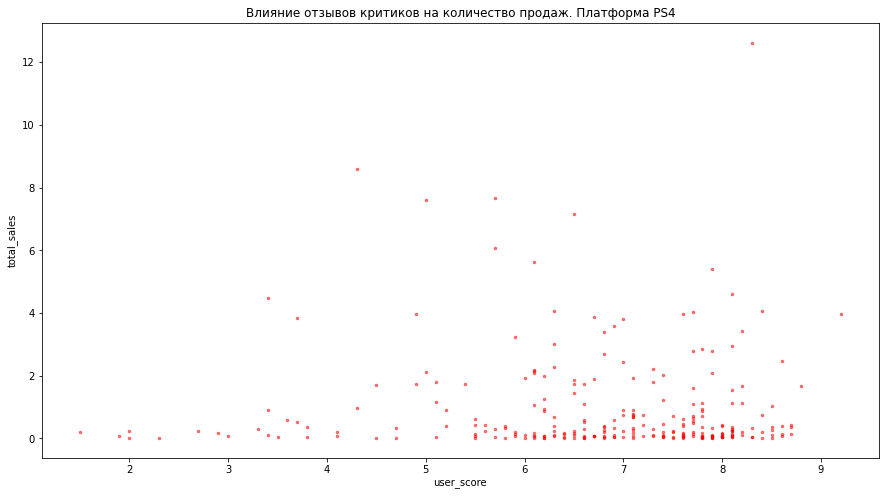

In [41]:
ps4_data = data[data['platform'] == 'PS4']

ps4_data.plot(kind='scatter',
        y='total_sales', x='critic_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа PS4')

ps4_data.plot(kind='scatter', 
        y='total_sales', x='user_score', alpha=0.5, figsize=(15,8), c = 'r', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа PS4')

И с другим масштабом

(0.0, 3.0)

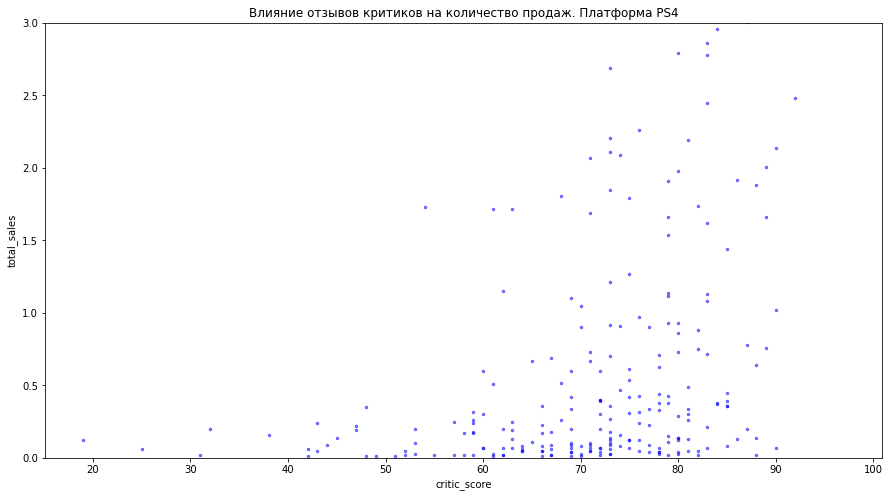

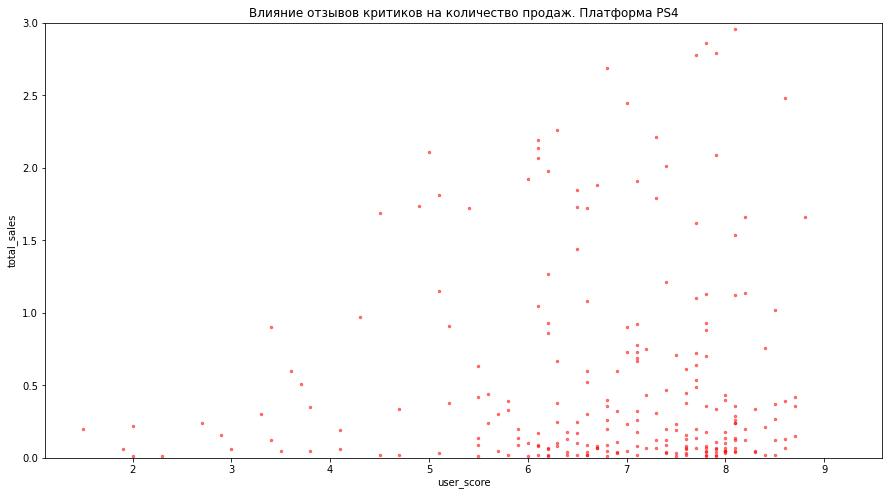

In [42]:
ps4_data.plot(kind='scatter',
        y='total_sales', x='critic_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа PS4')
plt.ylim(0, 3)

ps4_data.plot(kind='scatter', 
        y='total_sales', x='user_score', alpha=0.5, figsize=(15,8), c = 'r', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа PS4')
plt.ylim(0, 3)

In [43]:
critic_corr = ps4_data['total_sales'].corr(ps4_data['critic_score'])
user_corr = ps4_data['total_sales'].corr(ps4_data['user_score'])

print(f'Коэффициент корреляции между количеством продаж и отзывами критиков {critic_corr : .2f}')
print(f'Коэффициент корреляции между количеством продаж и отзывами пользователей {user_corr : .2f}')

Коэффициент корреляции между количеством продаж и отзывами критиков  0.41
Коэффициент корреляции между количеством продаж и отзывами пользователей -0.03


На основании построенных графиков и посчитанных коэффициентов корреляции можно сделать следующие выводы.
* Лидером по количеству продаж является платформа PS4. Также эта платформа весьма популярна среди разработчиков, на ее основе сделано больше всего игр по сравнению с остальными платформами
* Чем выше оценки (причем как критиков, так и пользователей), тем больший разброс по количеству продаж игры мы наблюдаем.
* В целом на диаграмме рассеяния, отражающей зависимость количества продаж от оценок пользователей, заметен более сильный разброс значений, чем на диаграмме с зависимостью от оценок критиков
* На диаграмме зависимости количества продаж от оценок критиков в районе больших значений оценки (70 и более) видна нелинейная зависимость: с ростом оценки резко растет количество продаж (хотя и не для всех значений). Это вполне логично: средняя оценка критиков довольно объективна
* С диаграммой зависимости от пользовательских оценок дела обстоят несколько иначе: с ростом оценки растет не только общее количество продаж, но и разброс значений
* Также из графиков, на которых данные изображены полностью, видно, что существуют выбросы. Причем на графике зависимости количества продаж от пользовательской оценки эти выбросы наблюдаются не только в области довольно высоких оценок, но и в области средних и низких (от 2 до 6). Вполне возможно, что это игры, которые вначале понравились пользователям, а потом в чем-то их разочаровали
* Коэффициенты корреляции говорят о том, что линейных зависимостей нет
* В итоге получаем, что оценки критиков слабо, но все-таки влияют на продажи, а вот оценки пользователей - нет

Посмотрим теперь на данные по другим популярным платформам и сравним их с полученными результатами

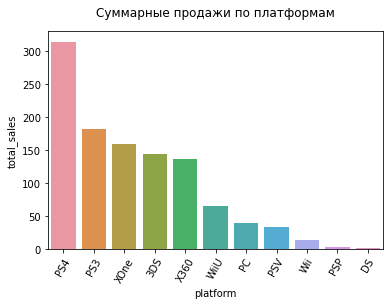

In [44]:
graph = sns.barplot(x=platforms_sales_pivot['platform'], y=platforms_sales_pivot['total_sales'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Суммарные продажи по платформам', pad=15)

plt.show()

Второе место по популярности занимает платформа PS3, третье - XOne. Используем их для сравнения. Построим для них аналогичные графики

Text(0.5, 1.0, 'Влияние отзывов критиков на количество продаж. Платформа PS3')

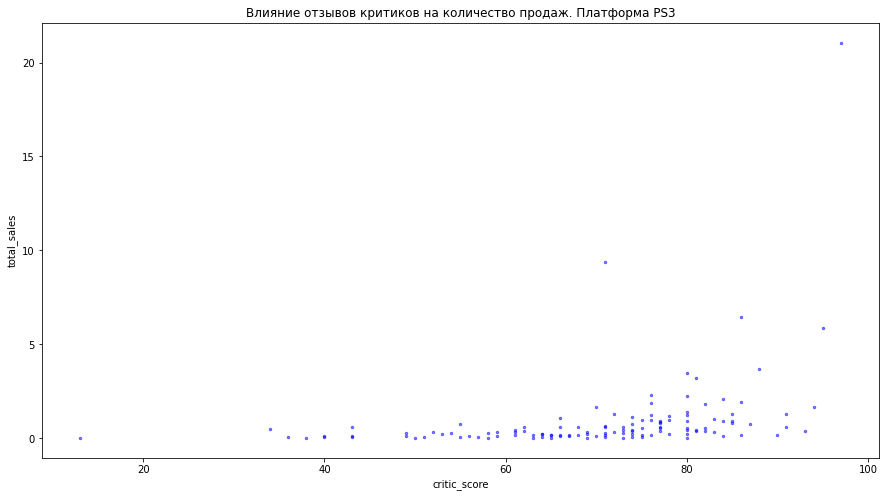

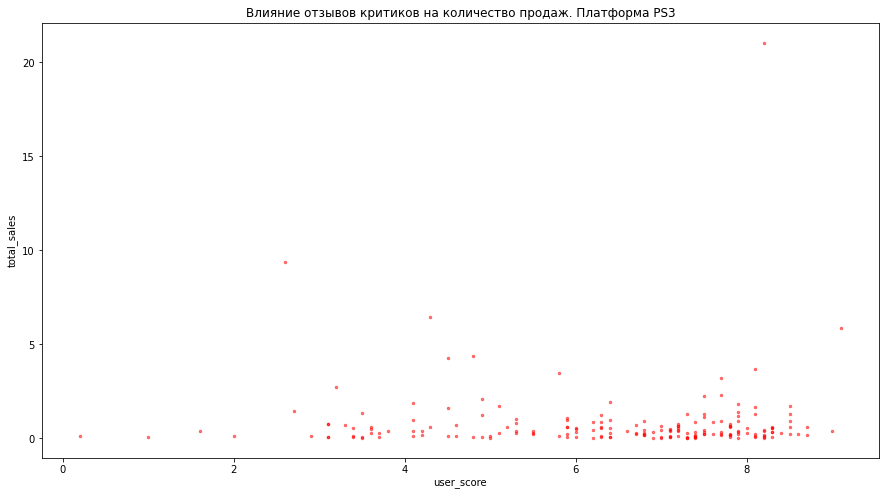

In [45]:
ps3_data = data[data['platform'] == 'PS3']

ps3_data.plot(kind='scatter',
        y='total_sales', x='critic_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа PS3')

ps3_data.plot(kind='scatter', 
        y='total_sales', x='user_score', alpha=0.5, figsize=(15,8), c = 'r', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа PS3')

(0.0, 3.0)

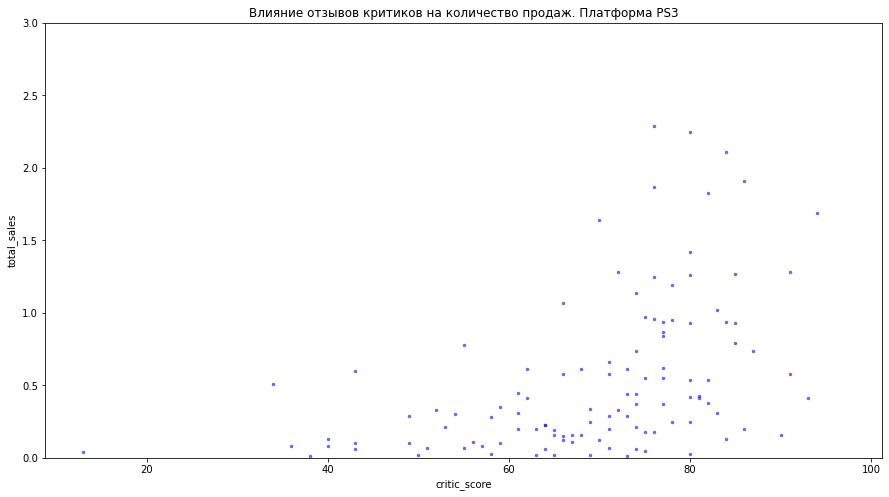

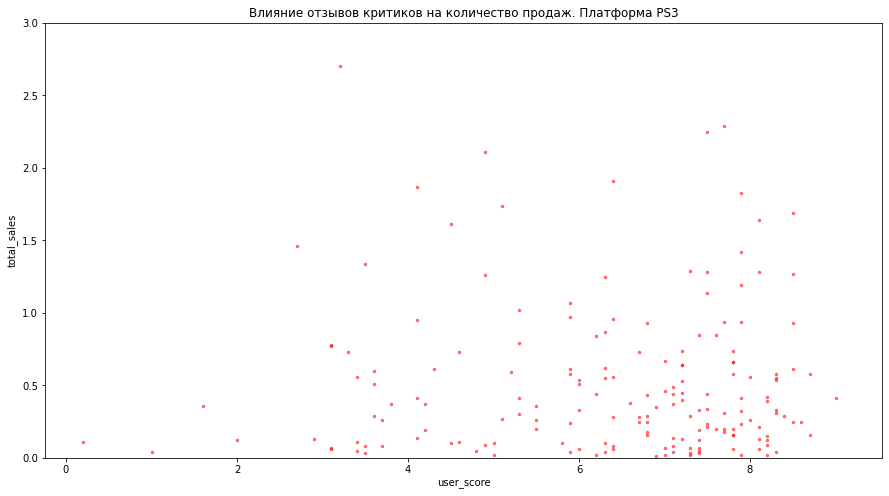

In [46]:
ps3_data.plot(kind='scatter',
        y='total_sales', x='critic_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа PS3')
plt.ylim(0, 3)

ps3_data.plot(kind='scatter', 
        y='total_sales', x='user_score', alpha=0.5, figsize=(15,8), c = 'r', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа PS3')
plt.ylim(0, 3)

В целом здесь ситуация похожа на то, что мы наблюдали для платформы PS4. Но есть некоторые отличия. Во-первых, у PS4 в области высоких оценок критиков наблюдается более сильный рост продаж, чем у PS3. Во-вторых, у PS3 на графиках зависимости числа продаж от пользовательских оценок и от оценок критиков наблюдается более сильный разброс значений, чем у PS4. Однако общая ситуация такая же: оценки критиков имеют слабое влияние на продажи, а оценки пользователей такого влияния почти не имеют

Теперь построим графики для XOne

Text(0.5, 1.0, 'Влияние отзывов критиков на количество продаж. Платформа XOne')

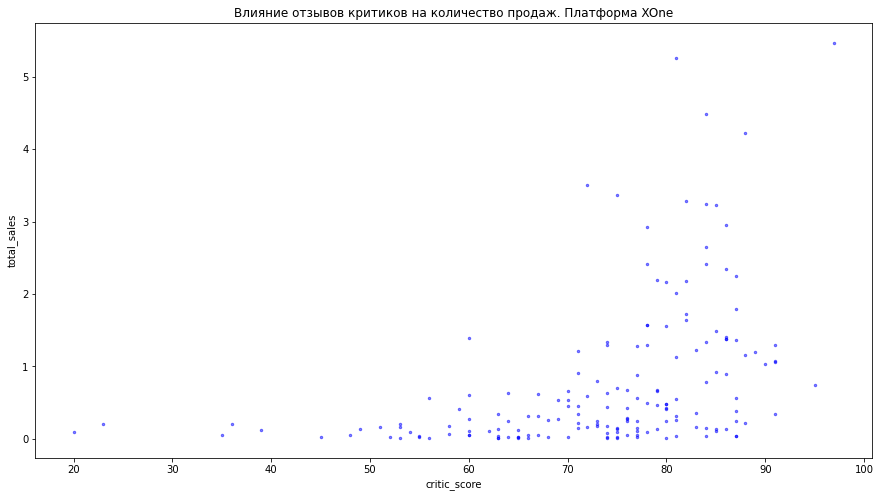

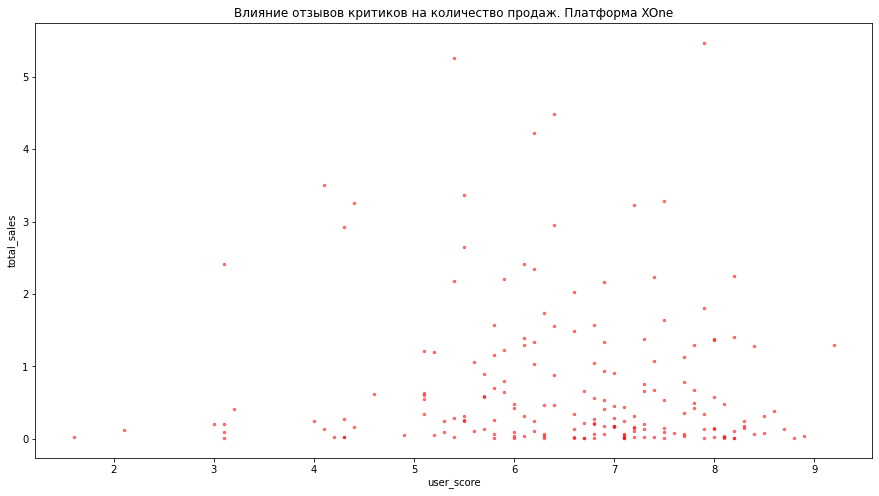

In [47]:
xone_data = data[data['platform'] == 'XOne']

xone_data.plot(kind='scatter',
        y='total_sales', x='critic_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа XOne')

xone_data.plot(kind='scatter', 
        y='total_sales', x='user_score', alpha=0.5, figsize=(15,8), c = 'r', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа XOne')

(0.0, 3.0)

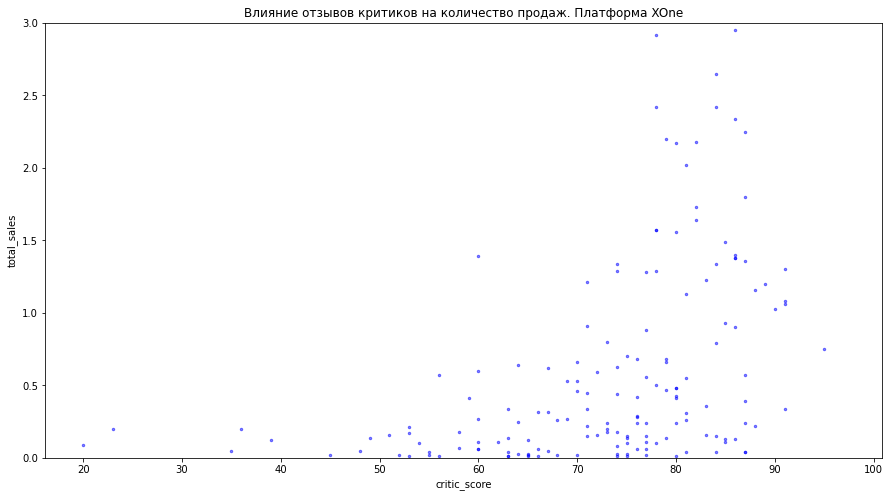

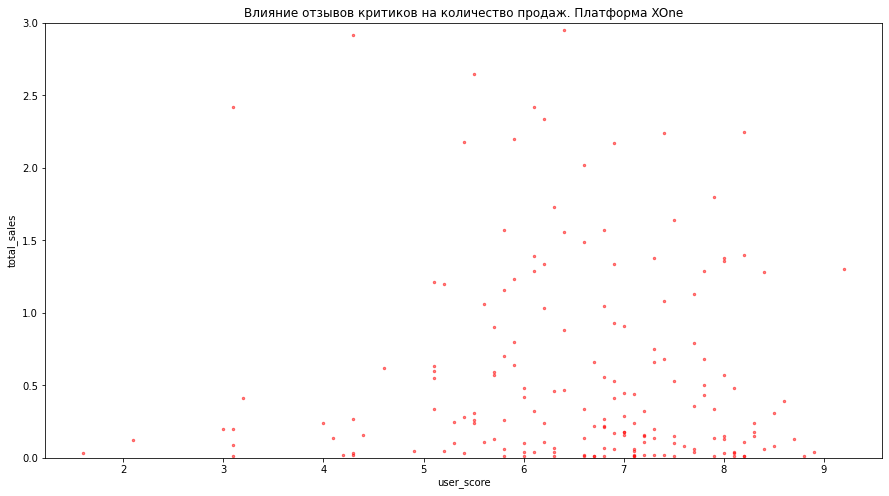

In [48]:
xone_data.plot(kind='scatter',
        y='total_sales', x='critic_score', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа XOne')
plt.ylim(0, 3)

xone_data.plot(kind='scatter', 
        y='total_sales', x='user_score', alpha=0.5, figsize=(15,8), c = 'r', s = 6)
plt.title('Влияние отзывов критиков на количество продаж. Платформа XOne')
plt.ylim(0, 3)

Здесь дела обстоят следующим образом. График с оценками критиков очень похож на аналогичный график для PS4. А вот график для оценок пользователей еще сильнее выражает отсутствие влияния оценок пользователей на продажи

### Анализ прибыльных жанров

Вначале посмотрим на общее распределение жанров по играм

In [49]:
genres_games_count = data.pivot_table(index='genre', values='name', aggfunc='count').sort_values(by='name', ascending=False)
genres_games_count = genres_games_count.rename(columns={'name' : 'count'})
genres_games_count

,count
genre,
Action,766
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,155
Racing,85
Fighting,80
Platform,74


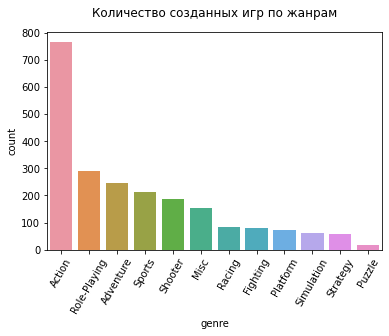

In [50]:
graph = sns.barplot(x=genres_games_count.index, y=genres_games_count['count'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество созданных игр по жанрам', pad=15)

plt.show()

Больше всего было создано игр жанра Action. Далее идет резкий спад пор количеству (более, чем в 2 раза) - жанры Role-Playing, Adventure, Sports, Shooter, затем наблюдается плавное уменьшение количества игр по оставшимся жанрам.

Теперь посмотрим на распределение жанров по прибыльности, то есть по количеству проданных копий. Чтобы найти самый прибыльный жанр, нужно посмотреть, какие жанры приносят стабильный доход. Поэтому будем смотреть не общую, а медианную сумму продаж по жанрам

In [51]:
genres_count = data.pivot_table(index='genre', values='total_sales', aggfunc='median')
genres_count = genres_count.sort_values(by='total_sales', ascending=False)
genres_count

,total_sales
genre,
Shooter,0.450
Sports,0.240
Platform,0.225
Role-Playing,0.125
Fighting,0.125
Racing,0.120
Action,0.110
Simulation,0.100
Misc,0.100


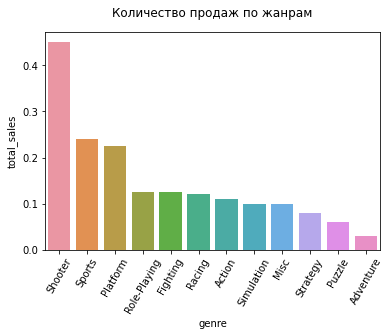

In [52]:
graph = sns.barplot(x=genres_count.index, y=genres_count['total_sales'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество продаж по жанрам', pad=15)

plt.show()

Здесь уже несколько другое распределение... Жанр Action, самый популярный по количеству созданных игр, сместился в середину списка. А в ТОП-3 вошли Shooter, Sports и Platform. Последние позиции занимают Puzzle и Adventure.

Таким образом, самый популярный жанр - Action, самые прибыльные - Shooter и Sports. Самый редкий и малоприбыльный - Puzzle

## Портреты пользователей разных регионов

### Самые популярные платформы

Сначала выведем общее распределение (`total_sales`)

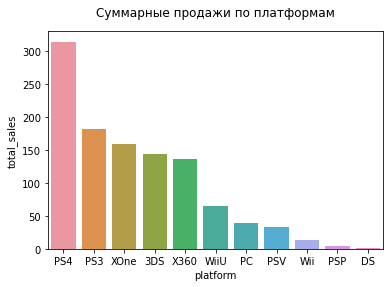

In [53]:
graph = sns.barplot(x=platforms_sales_pivot['platform'], y=platforms_sales_pivot['total_sales'])
#graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Суммарные продажи по платформам', pad=15)

plt.show()

##### Северная Америка

In [54]:
na_sales_data = data.pivot_table(index='platform', values=['na_sales', 'total_sales'], aggfunc='sum')
na_sales_data = na_sales_data.sort_values(by='na_sales', ascending=False)
na_sales_data

,na_sales,total_sales
platform,,
PS4,108.74,314.14
XOne,93.12,159.32
X360,81.66,136.80
PS3,63.50,181.43
3DS,38.20,143.25
WiiU,29.21,64.63
PC,11.11,39.43
Wii,6.56,13.66
PSV,5.04,32.99


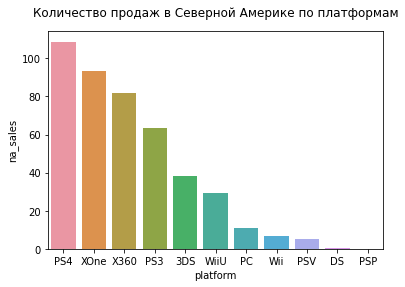

In [55]:
graph = sns.barplot(x=na_sales_data.index, y=na_sales_data['na_sales'])
#graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество продаж в Северной Америке по платформам', pad=15)

plt.show()

Выделим теперь ТОП-5 платформ и посчитаем для каждой из них следующий показатель: какую долю от общего числа продаж игр на основе этой платформы (в процентах) занимают продажи по Северной Америке.

In [56]:
na_sales_data = na_sales_data.iloc[:5]
na_sales_data['part_of_total_sales'] = round(na_sales_data['na_sales'] / na_sales_data['total_sales'] * 100, 1)
na_sales_data

,na_sales,total_sales,part_of_total_sales
platform,,,
PS4,108.74,314.14,34.6
XOne,93.12,159.32,58.4
X360,81.66,136.80,59.7
PS3,63.50,181.43,35.0
3DS,38.20,143.25,26.7


##### Европа

In [57]:
eu_sales_data = data.pivot_table(index='platform', values=['eu_sales', 'total_sales'], aggfunc='sum')
eu_sales_data = eu_sales_data.sort_values(by='eu_sales', ascending=False)
eu_sales_data

,eu_sales,total_sales
platform,,
PS4,141.09,314.14
PS3,67.81,181.43
XOne,51.59,159.32
X360,42.52,136.80
3DS,30.96,143.25
PC,25.36,39.43
WiiU,19.85,64.63
PSV,6.10,32.99
Wii,5.93,13.66


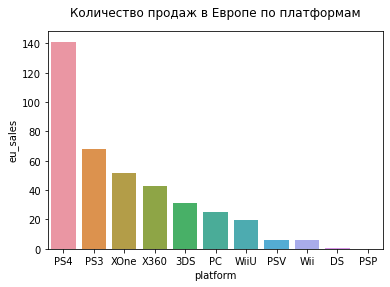

In [58]:
graph = sns.barplot(x=eu_sales_data.index, y=eu_sales_data['eu_sales'])
#graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество продаж в Европе по платформам', pad=15)

plt.show()

Выделим теперь ТОП-5 платформ и посчитаем для каждой из них следующий показатель: какую долю от общего числа продаж игр на основе этой платформы (в процентах) занимают продажи по Европе.

In [59]:
eu_sales_data = eu_sales_data.iloc[:5]
eu_sales_data['part_of_total_sales'] = round(eu_sales_data['eu_sales'] / eu_sales_data['total_sales'] * 100, 1)
eu_sales_data

,eu_sales,total_sales,part_of_total_sales
platform,,,
PS4,141.09,314.14,44.9
PS3,67.81,181.43,37.4
XOne,51.59,159.32,32.4
X360,42.52,136.80,31.1
3DS,30.96,143.25,21.6


##### Япония

In [60]:
jp_sales_data = data.pivot_table(index='platform', values=['jp_sales', 'total_sales'], aggfunc='sum')
jp_sales_data = jp_sales_data.sort_values(by='jp_sales', ascending=False)
jp_sales_data

,jp_sales,total_sales
platform,,
3DS,67.81,143.25
PS3,23.35,181.43
PSV,18.59,32.99
PS4,15.96,314.14
WiiU,10.88,64.63
PSP,3.29,3.50
X360,0.51,136.80
XOne,0.34,159.32
Wii,0.05,13.66


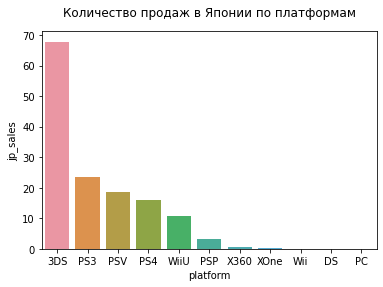

In [61]:
graph = sns.barplot(x=jp_sales_data.index, y=jp_sales_data['jp_sales'])
#graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество продаж в Японии по платформам', pad=15)

plt.show()

Выделим теперь ТОП-5 платформ и посчитаем для каждой из них следующий показатель: какую долю от общего числа продаж игр на основе этой платформы (в процентах) занимают продажи по Японии.

In [62]:
jp_sales_data = jp_sales_data.iloc[:5]
jp_sales_data['part_of_total_sales'] = round(jp_sales_data['jp_sales'] / jp_sales_data['total_sales'] * 100, 1)
jp_sales_data

,jp_sales,total_sales,part_of_total_sales
platform,,,
3DS,67.81,143.25,47.3
PS3,23.35,181.43,12.9
PSV,18.59,32.99,56.4
PS4,15.96,314.14,5.1
WiiU,10.88,64.63,16.8


**Проведем сравнение**

1) Популярные платформы
  * Америка: PS4, XOne, X360, PS3, 3DS
  * Европа: PS4, PS3, XOne, X360, 3DS
  * Япония: 3DS, PS3, PSV, PS4, WiiU

2) Доли продаж по регионам (от общего числа продаж по платформам)
  * `PS4`
    * Америка: 34.6%
    * Европа: 44.9%
    * Япония: 5.1%
  * `XOne`
    * Америка: 58.4%
    * Европа: 32.4%
    * Япония: -
  * `X360`
    * Америка: 59.7%
    * Европа: 31.1%
    * Япония: -
  * `PS3`
    * Америка: 35%
    * Европа: 37.4%
    * Япония: 12.9%
  * `3DS`
    * Америка: 26.7%
    * Европа: 21.6%
    * Япония: 47.3%
  * `PSV`
    * Америка: -
    * Европа: -
    * Япония: 56.4%
  * `WiiU`
    * Америка: -
    * Европа: -
    * Япония: 16.8%

Видно, что в Америке и в Европе списки платформ совпадают, а вот в Японии популярностью пользуется несколько другой набор платформ. Совпадения имеются, но их уже меньше.

### Самые популярные жанры

Сначала посмотрим на общее распределение (`genres`)

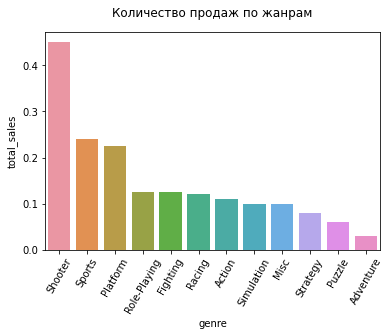

In [63]:
graph = sns.barplot(x=genres_count.index, y=genres_count['total_sales'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество продаж по жанрам', pad=15)

plt.show()

##### Северная Америка

In [64]:
na_genres_data = data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
na_genres_data = na_genres_data.sort_values(by='na_sales', ascending=False)
na_genres_data

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49
Platform,18.14
Fighting,15.55
Racing,12.96
Adventure,7.14


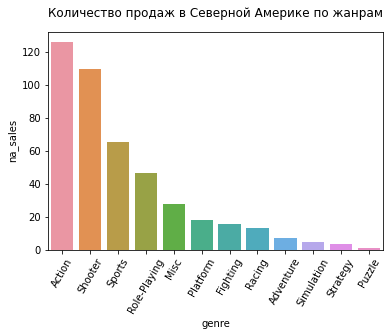

In [65]:
graph = sns.barplot(x=na_genres_data.index, y=na_genres_data['na_sales'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество продаж в Северной Америке по жанрам', pad=15)

plt.show()

Выделим ТОП-5 жанров по популярности в Северной Америке

In [66]:
na_genres_data = na_genres_data.iloc[:5]
na_genres_data

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


##### Европа

In [67]:
eu_genres_data = data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
eu_genres_data = eu_genres_data.sort_values(by='eu_sales', ascending=False)
eu_genres_data

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19
Misc,20.04
Platform,15.58
Simulation,10.92
Fighting,8.55


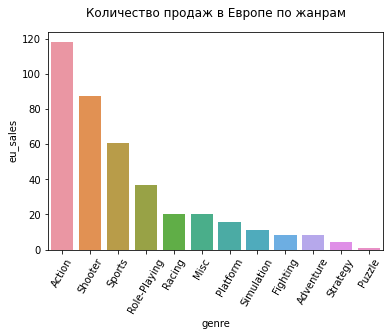

In [68]:
graph = sns.barplot(x=eu_genres_data.index, y=eu_genres_data['eu_sales'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество продаж в Европе по жанрам', pad=15)

plt.show()

Выделим ТОП-5 жанров по популярности в Европе

In [69]:
eu_genres_data = eu_genres_data.iloc[:5]
eu_genres_data

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


##### Япония

In [70]:
jp_genres_data = data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
jp_genres_data = jp_genres_data.sort_values(by='jp_sales', ascending=False)
jp_genres_data

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61
Adventure,5.82
Sports,5.41
Platform,4.79
Simulation,4.52


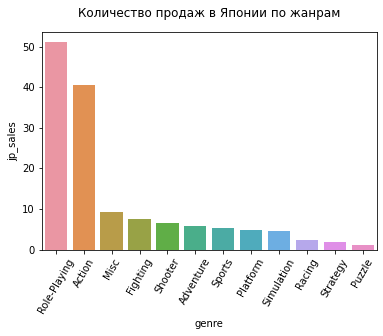

In [71]:
graph = sns.barplot(x=jp_genres_data.index, y=jp_genres_data['jp_sales'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=60)
graph.set_title('Количество продаж в Японии по жанрам', pad=15)

plt.show()

Выделим ТОП-5 жанров по популярности в Японии

In [72]:
jp_genres_data = jp_genres_data.iloc[:5]
jp_genres_data

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


**Проведем сравнение**

* В Америке и в Европе списки популярных жанров (Action, Shooter, Sports, Role-Playing) совпадают почти полностью. Отличается только один элемент: в Америке - Misc, а в Европе - Racing. Распределения продаж по жанрам тоже весьма похожи
* В Японии этот список несколько отличается (Role-Playing, Action, Misc, Fighting, Shooter). Распределение продаж по жанрам тоже выглядит по-другому

### Влияние рейтинга ESRB на продажи в отдельном регионе

Сначала посмотрим на общее распределение

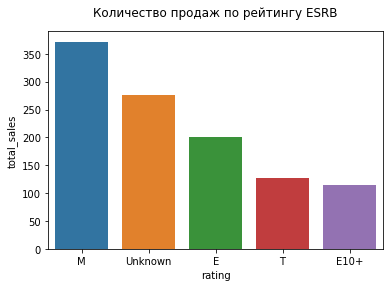

In [73]:
esrb_data = data.pivot_table(index='rating', values='total_sales', aggfunc='sum')
esrb_data = esrb_data.sort_values(by='total_sales', ascending=False)

graph = sns.barplot(x=esrb_data.index, y=esrb_data['total_sales'])
graph.set_title('Количество продаж по рейтингу ESRB', pad=15)

plt.show()

##### Северная Америка

In [74]:
na_rating_data = data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
na_rating_data = na_rating_data.sort_values(by='na_sales', ascending=False)
na_rating_data

,na_sales
rating,
M,165.21
Unknown,89.42
E,79.05
E10+,54.24
T,49.79


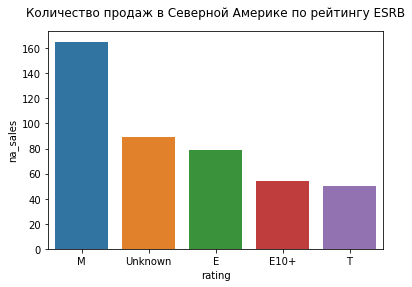

In [75]:
graph = sns.barplot(x=na_rating_data.index, y=na_rating_data['na_sales'])
graph.set_title('Количество продаж в Северной Америке по рейтингу ESRB', pad=15)

plt.show()

Распределение по рейтингам проданных игр в Америке примерно повторяет общее распределение. Больше всего продается игр категорий M, E и Unknown, следом идут категории E10+ и T

##### Европа

In [76]:
eu_rating_data = data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
eu_rating_data = eu_rating_data.sort_values(by='eu_sales', ascending=False)
eu_rating_data

,eu_sales
rating,
M,145.32
E,83.36
Unknown,78.91
E10+,42.69
T,41.95


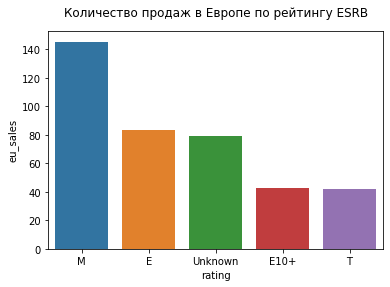

In [77]:
graph = sns.barplot(x=eu_rating_data.index, y=eu_rating_data['eu_sales'])
graph.set_title('Количество продаж в Европе по рейтингу ESRB', pad=15)

plt.show()

Распределение по Европе не сильно отличается от общего распределения и от распределения по Америке. Больше всего продается игр категорий M, затем E и Unknown, следом идут категории E10+ и T. Также стоит отметить, что по абсолютному количеству игр каждой категории лидирует Америка

##### Япония

In [78]:
jp_rating_data = data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
jp_rating_data = jp_rating_data.sort_values(by='jp_sales', ascending=False)
jp_rating_data

,jp_sales
rating,
Unknown,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


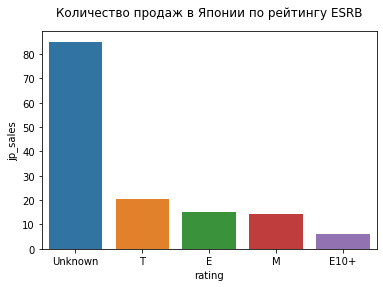

In [79]:
graph = sns.barplot(x=jp_rating_data.index, y=jp_rating_data['jp_sales'])
graph.set_title('Количество продаж в Японии по рейтингу ESRB', pad=15)

plt.show()

Распределение по Японии сильно отличается от двух предыдущих. Если в Америке и в Европе лидирующими категориями являлись M, E и Unknown, то в Японии самая популярная категория - Unknown, что в целом неудивительно, ведь ESRB предназначена для работы в США и Канаде. Следующие по популярности - T, E и M. На последнем месте стоит E10+

**Проведем сравнение**

* В Америке и в Европе ситуация снова похожая. Распределения по категориям рейтинга ESRB примерно совпадают (M, E/Unknown, E/Unknown, E10+, T). В Японии ситуация иная: Unknown, T, E, M, E10+

### Общий портрет пользователей по регионам

**Америка**
* Популярные платформы: PS4, XOne, X360, PS3, 3DS
* Популярные жанры: Action, Shooter, Sports, Role-Playing, Misc
* Самый популярный жанр - Action
* Рейтинг ESRB: M, Unknown, E, E10+, T

**Европа**
* Популярные платформы: PS4, PS3, XOne, X360, 3DS
* Популярные жанры: Action, Shooter, Sports, Role-Playing, Racing
* Самый популярный жанр - Action
* Рейтинг ESRB: M, E, Unknown, E10+, T

**Япония**
* Популярные платформы: 3DS, PS3, PSV, PS4, WiiU
* Популярные жанры: Role-Playing, Action, Misc, Fighting, Shooter
* Самый популярный жанр - Role-Playing
* Рейтинг ESRB: Unknown, T, E, M, E10+


Отсюда можно сделать следующий вывод. Пользовательские привычки в Америке и в Европе довольно похожи: список популярных жанров и их распределение по популярности совпадают, списки популярных платформ тоже в целом схожи, распределение по рейтингам ESRB также совпадают. А вот привычки пользователей Японии отличаются. У них другой список популярных платформ, другое распределение жанров, также список популярных жанров отличается на один элемент. Самый популярный жанр в Европе и Америке - Action, в Японии - Role-Playing. И еще одно отличие - распределение рейтинга ESRB.

Получается, что рейтинг ESRB все-таки оказывает влияние на продажи в отдельном регионе.

## Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC

$H_0$ : Средние пользовательские рейтинги платформ Xbox One и PC равны

$H_1$ : Средние пользовательские рейтинги платформ Xbox One и PC различаются

Гипотезы были сформулированы тааким образом, потому что $H_0$ лучше формулировать так, чтобы в ней содержался знак равенства, так с ней проще работать.

Теперь о выборе критерия. Мы имеем дело с двумя генеральными совокупностями: игры, созданные на Xbox One, и игры, созданные на PC. Соответственно, будем проверять гипотезу равенства средних двух генеральных совокупностей. Для этого используется метод `scipy.stats.ttest_ind()` на основе t-теста (его можно применять, так как наши генеральные совокупности не зависят друг от друга). Единственное, что следует проверить перед использованием этого метода, - это значение для параметра equal_var (равенство дисперсий выборок). Для этого посмотрим на размеры соответствующих выборок и попробуем оценить их дисперсии.

Еще одно важное замечание. Проверяемая гипотеза является двусторонней, поэтому p-value также будем смотреть двусторонний

In [80]:
xone = data.loc[data['platform'] == 'XOne', 'user_score']
pc = data.loc[data['platform'] == 'PC', 'user_score']

Перед рассчетом дисперсии убедимся, что в данных нет пропусков. А если пропуски есть, удалим их.

In [81]:
xone.isna().sum(), pc.isna().sum()

(65, 34)

In [82]:
xone = xone[~xone.isna()]
pc = pc[~pc.isna()]

print('Количество оставшихся пропусков', (xone.isna().sum(), pc.isna().sum()))
print('Размеры выборок', (xone.shape[0], pc.shape[0]))

Количество оставшихся пропусков (0, 0)
Размеры выборок (182, 155)


In [83]:
round(np.var(xone, ddof=1), 3), round(np.var(pc, ddof=1), 3)

(1.907, 3.036)

Размеры выборок отличаются незначительно, а вот дисперсии сильно разные. Причем для шкалы от 1 до 10 эта разница довольно существенная. Примем `equal_var = False`

In [84]:
results = st.ttest_ind(xone, pc, equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


##### Средние пользовательские рейтинги жанров Action и Sports

$H_0$ : Средние пользовательские рейтинги жанров Action и Sports равны

$H_1$ : Средние пользовательские рейтинги жанров Action и Sports различаются

Для проверки этих гипотез также будем использовать метод `scipy.stats.ttest_ind()`, потому что мы снова имеем дело с двумя независимыми совокупностями и хотим проверить гипотезу равенства их средних. Как и в случае предыдущей гипотезы, выберем значение для параметра `equal_var`

In [85]:
action = data.loc[data['genre'] == 'Action', 'user_score']
sports = data.loc[data['genre'] == 'Sports', 'user_score']

action = action[~action.isna()]
sports = sports[~sports.isna()]

print('Количество оставшихся пропусков', (action.isna().sum(), sports.isna().sum()))
print('Размеры выборок', (action.shape[0], sports.shape[0]))

Количество оставшихся пропусков (0, 0)
Размеры выборок (389, 160)


In [86]:
round(np.var(action, ddof=1), 3), round(np.var(sports, ddof=1), 3)

(1.769, 3.181)

Размеры выборок разные, дисперсии тоже отличаются довольно сильно. Примем `equal_var = False`

In [87]:
results = st.ttest_ind(action, sports, equal_var=False)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.4460039700704315e-20
Отвергаем нулевую гипотезу


## Общий вывод

1) Количество игр по годам
  * В 80-е годы 20 века игр выпускалось очень мало по сравнению с последующими годами. В 90-е годы начался постепенный рост количества выпускавшихся игр, а своего максимума это количество достигло в 2008-2009 годах, после чего снова начался спад, причем более резкий, чем рост. Далее ситуация стабилизировалась

2) Актуальный период
  * В основном платформы "живут" около 10-12 лет. А вот характерное время, когда платформа является довольно популярной, чаще всего составляет 5-7 лет
  * Актуальный период 2013-2016 годы

3) Продажи по платформам
  * Потенциально прибыльные платформы: PS4, 3DS и XOne, причем самая потенциально прибыльная из них - PS4
  * Платформы образуют несколько групп по количеству продаж. PS4, XOne, X360, Wii (от 0 до 1.8 млн продаж на игру). Следующая группа: WiiU, PS3 (диапазон количества продаж: 0-1.2 млн). И последняя группа: DS, PC, PSP, PSV, 3DS (диапазон продаж: 0-0.5 млн)
  * Большинство игр собирают до 2 млн продаж, однако встречаются и такие, которые собирают от 2 до 5 млн или даже больше 10 млн. Но это уже какие-то отдельные, получившие признание публики, игры

4) Влияние отзывов на количество продаж
  * Лидером по количеству продаж является платформа PS4. Также эта платформа весьма популярна среди разработчиков, на ее основе сделано больше всего игр по сравнению с остальными платформами
  * Анализ платформы PS4
    * Чем выше оценки (причем как критиков, так и пользователей), тем больший разброс по количеству продаж игры мы наблюдаем.
    * В целом на диаграмме рассеяния, отражающей зависимость количества продаж от оценок пользователей, заметен более сильный разброс значений, чем на диаграмме с зависимостью от оценок критиков
    * На диаграмме зависимости количества продаж от оценок критиков в районе больших значений оценки (70 и более) видна нелинейная зависимость: с ростом оценки резко растет количество продаж (хотя и не для всех значений). Это вполне логично: средняя оценка критиков довольно объективна
    * С диаграммой зависимости от пользовательских оценок дела обстоят несколько иначе: с ростом оценки растет не только общее количество продаж, но и разброс значений
    * Также из графиков, на которых данные изображены полностью, видно, что существуют выбросы. Причем на графике зависимости количества продаж от пользовательской оценки эти выбросы наблюдаются не только в области довольно высоких оценок, но и в области средних и низких (от 2 до 6). Вполне возможно, что это игры, которые вначале понравились пользователям, а потом в чем-то их разочаровали
    * Коэффициенты корреляции говорят о том, что линейных зависимостей нет
    * В итоге получаем, что оценки критиков слабо, но все-таки влияют на продажи, а вот оценки пользователей - нет
  * Платформа PS3
    * Здесь ситуация похожа на то, что мы наблюдали для платформы PS4. Но есть некоторые отличия
    * У PS4 в области высоких оценок критиков наблюдается более сильный рост продаж, чем у PS3
    * У PS3 на графиках зависимости числа продаж от пользовательских оценок и от оценок критиков наблюдается более сильный разброс значений, чем у PS4
    * Общая ситуация такая же: оценки критиков имеют слабое влияние на продажи, а оценки пользователей такого влияния почти не имеют
  * Платформа XOne
    * График с оценками критиков очень похож на аналогичный график для PS4
    * А график для оценок пользователей еще сильнее выражает отсутствие влияния оценок пользователей на продажи

5) Анализ прибыльных жанров
  * Больше всего игр жанра Action. Далее идет резкий спад пор количеству (более, чем в 2 раза) - жанры Role-Playing, Adventure, Sports, Shooter, затем наблюдается плавное уменьшение количества игр по оставшимся жанрам
  * Самый популярный жанр - Action, самые прибыльные - Shooter и Sports. Самый редкий и малоприбыльный - Puzzle

6) Портрет пользователей разных регионов
  * **Америка**
    * Популярные платформы: PS4, XOne, X360, PS3, 3DS
    * Популярные жанры: Action, Shooter, Sports, Role-Playing, Misc
    * Самый популярный жанр - Action
    * Рейтинг ESRB: M, Unknown, E, E10+, T

  * **Европа**
    * Популярные платформы: PS4, PS3, XOne, X360, 3DS
    * Популярные жанры: Action, Shooter, Sports, Role-Playing, Racing
    * Самый популярный жанр - Action
    * Рейтинг ESRB: M, E, Unknown, E10+, T

  * **Япония**
    * Популярные платформы: 3DS, PS3, PSV, PS4, WiiU
    * Популярные жанры: Role-Playing, Action, Misc, Fighting, Shooter
    * Самый популярный жанр - Role-Playing
    * Рейтинг ESRB: Unknown, T, E, M, E10+

  * Отсюда можно сделать следующий вывод. Пользовательские привычки в Америке и в Европе довольно похожи: список популярных жанров и их распределение по популярности совпадают, списки популярных платформ тоже в целом схожи, распределение по рейтингам ESRB также совпадают. А вот привычки пользователей Японии отличаются. У них другой список популярных платформ, другое распределение жанров, также список популярных жанров отличается на один элемент. Самый популярный жанр в Европе и Америке - Action, в Японии - Role-Playing. И еще одно отличие - распределение рейтинга ESRB

7) Проверка гипотез
  * Средние пользовательские рейтинги платформ Xbox One и PC
    * Нулевую гипотезу о равенстве средних отвергнуть не получилось
  * Средние пользовательские рейтинги жанров Action и Sports
    * Нулевая гипотеза о равенстве средних была отвергнута на основании результатов t-теста. Альтернативную гипотезу о том, что эти средние различны приняли верной

**Главный вывод**

1. Самые потенциально прибыльные платформы: PS4 (основная), 3DS и XOne (резервные)
2. Самые прибыльные в Америке и Европе жанры - Shooter и Sports, в Японии - Role-Playing и Action
3. Самый популярный жанр (во всех регионах) - Action
4. Самые популярные рейтинги ESRB в Европе и Америке - M, E и Unknown; в Японии - Unknown, T